In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

sns.set(color_codes = True)
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.palplot(sns.color_palette("GnBu_d"))

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [2]:
%store -r turnstiles_df_cleaned  

In [3]:
turnstiles_df_cleaned.info() # time of the day, more exits or enteries 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2706152 entries, 1 to 209690
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unique_Turnstile  object 
 1   STATION           object 
 2   DATE              object 
 3   TIME              object 
 4   Entry_Count       float64
 5   Exit_Count        float64
dtypes: float64(2), object(4)
memory usage: 144.5+ MB


In [4]:
turnstiles_df_cleaned['Date_Time'] = turnstiles_df_cleaned['DATE'] + ',' + turnstiles_df_cleaned['TIME']
turnstiles_df_cleaned['Date_Time'] = pd.to_datetime(turnstiles_df_cleaned['Date_Time'],
                                format="%m/%d/%Y,%H:%M:%S")

In [5]:
turnstiles_df_cleaned = turnstiles_df_cleaned.drop(['DATE','TIME'], axis=1)
turnstiles_df_cleaned = turnstiles_df_cleaned[['Unique_Turnstile', 'STATION', 'Date_Time', 'Entry_Count', 'Exit_Count']]


In [6]:
turnstiles_df_cleaned.head()

,Unique_Turnstile,STATION,Date_Time,Entry_Count,Exit_Count
1,A002R05102-00-00,59 ST,2021-01-16 07:00:00,4.0,7.0
2,A002R05102-00-00,59 ST,2021-01-16 11:00:00,21.0,33.0
3,A002R05102-00-00,59 ST,2021-01-16 15:00:00,84.0,41.0
4,A002R05102-00-00,59 ST,2021-01-16 19:00:00,136.0,17.0
5,A002R05102-00-00,59 ST,2021-01-16 23:00:00,87.0,8.0


turnstiles_df_cleaned_Date = turnstiles_df_cleaned.set_index('Date_Time').rolling(window=20).mean()

In [7]:
turnstiles_df_cleaned['Day']= turnstiles_df_cleaned['Date_Time'].dt.dayofweek

In [8]:
days_week = [[0, 'Monday'], [1, 'Tuesday'], [2, 'Wednesday'], [3,'Thursday'],[4,'Friday'], [5, 'Saturday'], [6,'Sunday' ]]

In [9]:
df_weekdays = pd.DataFrame(days_week, columns = ['Day', 'Day_Week'])

In [10]:
turnstiles_df_cleaned_day = pd.merge(turnstiles_df_cleaned,df_weekdays, on = 'Day',how='left')

In [11]:
turnstiles_df_cleaned_day = turnstiles_df_cleaned_day.drop(['Day'], axis=1)
turnstiles_df_cleaned_day.head()

,Unique_Turnstile,STATION,Date_Time,Entry_Count,Exit_Count,Day_Week
0,A002R05102-00-00,59 ST,2021-01-16 07:00:00,4.0,7.0,Saturday
1,A002R05102-00-00,59 ST,2021-01-16 11:00:00,21.0,33.0,Saturday
2,A002R05102-00-00,59 ST,2021-01-16 15:00:00,84.0,41.0,Saturday
3,A002R05102-00-00,59 ST,2021-01-16 19:00:00,136.0,17.0,Saturday
4,A002R05102-00-00,59 ST,2021-01-16 23:00:00,87.0,8.0,Saturday


## Least Entered Subway Stations from Jan 2021 to April 2021


In [12]:
# Top 10 least enteretd stations overall
riders_station = turnstiles_df_cleaned_day.groupby(['STATION']).mean()\
    .sort_values('Entry_Count', ascending=True)\
    .reset_index()

riders_station.head() # This is counting entries and exits over the a 3 month period 

,STATION,Entry_Count,Exit_Count
0,BROAD CHANNEL,4.696691,1196.192402
1,ROCKAWAY PARK B,7.335046,13.549358
2,BEACH 90 ST,12.034211,329.119549
3,PARK PLACE,17.619346,25.634895
4,AVENUE N,21.985348,1184.812402


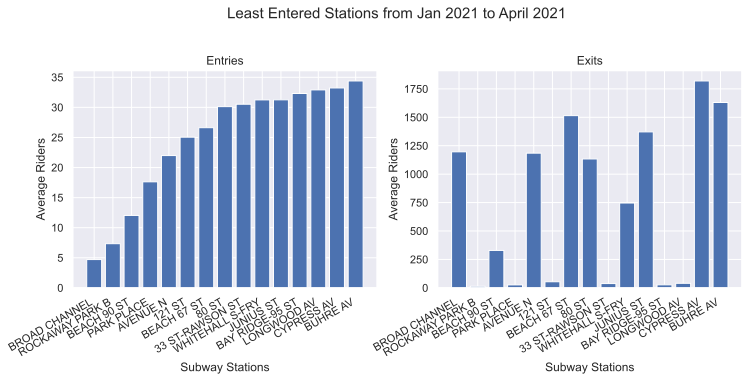

In [13]:
x = riders_station['STATION'][:15] 
y = riders_station['Entry_Count'][:15]
z  = riders_station['Exit_Count'][:15]



plt.figure(figsize=[12,4])

plt.suptitle('Least Entered Stations from Jan 2021 to April 2021',fontsize = 15, y=1.10)
plt.xlabel('Average Riders')


plt.subplot(1,2,1) # (number of rows, number of columns, number of plot)
plt.bar(x,y)
plt.title('Entries')
plt.xticks(rotation=30, ha='right');
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(1,2,2)
plt.bar(x,z)
plt.title('Exits')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders');


### Found this recent news article about Broad Channel street - https://www.rockawave.com/articles/stabbing-at-broad-channel-a-train/

## Entries and Exits by days of the week

In [14]:
riders_days = turnstiles_df_cleaned_day.groupby(['Day_Week']).mean()\
              .reset_index()

riders_days.head(10) 

,Day_Week,Entry_Count,Exit_Count
0,Friday,65.150899,67.506129
1,Monday,66.064008,65.247341
2,Saturday,7301.414104,8057.023497
3,Sunday,33.134268,36.098231
4,Thursday,73.046404,64.647292
5,Tuesday,68.070145,66.281869
6,Wednesday,63.749077,65.111357


In [15]:
# Extremly large volumes on Saturday. Looks like some turnstiles are recording large numbers at midnight on saturdays

In [16]:
mask = ((turnstiles_df_cleaned_day["Day_Week"] == "Saturday")&
(turnstiles_df_cleaned_day["Entry_Count"] > 4000))
       
turnstiles_df_cleaned_day[mask].sort_values('Entry_Count', ascending=False)

,Unique_Turnstile,STATION,Date_Time,Entry_Count,Exit_Count,Day_Week
720391,N420BR31700-06-02,CLINTON-WASH AV,2021-02-06 00:00:00,499827.0,316692.0,Saturday
1943557,N181AR46400-06-02,AQUEDUCT RACETR,2021-03-20 00:00:00,499792.0,20353.0,Saturday
2266160,R509R12100-00-05,QUEENSBORO PLZ,2021-03-27 00:00:00,499449.0,268134.0,Saturday
143269,R160R16402-03-00,66 ST-LINCOLN,2021-01-16 00:00:00,499319.0,0.0,Saturday
512736,N420BR31700-06-02,CLINTON-WASH AV,2021-01-30 00:00:00,499107.0,316593.0,Saturday
...,...,...,...,...,...,...
1862426,R610R05700-05-01,ATL AV-BARCLAY,2021-03-13 03:00:00,4011.0,127.0,Saturday
2367311,N300R11301-00-00,7 AV,2021-04-03 01:00:00,4011.0,28752.0,Saturday
95149,N409R26800-03-01,METROPOLITAN AV,2021-01-16 00:00:00,4009.0,30159.0,Saturday
1655949,R610R05700-05-01,ATL AV-BARCLAY,2021-03-06 03:00:00,4006.0,127.0,Saturday


In [17]:
turnstiles_df_cleaned_day[mask].describe(percentiles=[.90]) # 90th percentile was above 170. Dropping all rows above 200

,Entry_Count,Exit_Count
count,16046.000000,16046.000000
mean,174968.420541,95122.885641
std,142509.157510,125346.037160
min,4006.000000,0.000000
50%,139407.500000,39156.500000
90%,402392.000000,313034.500000
max,499827.000000,499413.000000


In [18]:
turnstiles_df_cleaned_day.drop(turnstiles_df_cleaned_day[(turnstiles_df_cleaned_day["Day_Week"] == 'Saturday')&
                                                        (turnstiles_df_cleaned_day["Entry_Count"] > 200)].index, inplace = True)

In [19]:
turnstiles_df_cleaned_day.drop(turnstiles_df_cleaned_day[(turnstiles_df_cleaned_day["Day_Week"] == 'Saturday')&
                                                        (turnstiles_df_cleaned_day["Exit_Count"] > 200)].index, inplace = True)

In [20]:
riders_days_new = turnstiles_df_cleaned_day.groupby(['Day_Week']).mean()\
              .reset_index()

riders_days_new.head(10) 

,Day_Week,Entry_Count,Exit_Count
0,Friday,65.150899,67.506129
1,Monday,66.064008,65.247341
2,Saturday,27.329120,28.523734
3,Sunday,33.134268,36.098231
4,Thursday,73.046404,64.647292
5,Tuesday,68.070145,66.281869
6,Wednesday,63.749077,65.111357


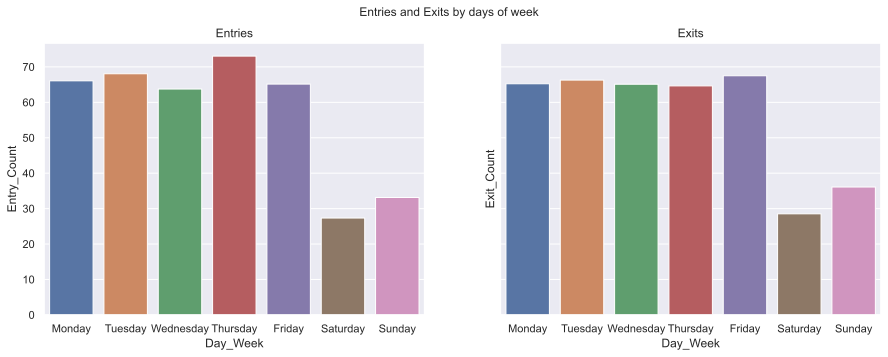

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Entries and Exits by days of week')


sns.barplot(ax=axes[0], x = 'Day_Week',y='Entry_Count',data=riders_days_new,order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday' ] )
axes[0].set_title('Entries')



sns.barplot(ax=axes[1], x = 'Day_Week',y='Exit_Count',data=riders_days_new,order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday' ] )
axes[1].set_title('Exits');

In [22]:
hours = turnstiles_df_cleaned_day.Date_Time.dt.hour.values # Before 12PM = Morning, 12 to 5PM = Afternoon, 5PM to 9 PM = Evening, 9 to Midnight = Night 
turnstiles_df_cleaned_day['timeOfDay'] = np.where(hours <= 12, 'Morning', 
                                     np.where(hours <= 17, 'Afternoon',
                                     np.where(hours <= 21, 'Evening', 'Night')))


In [23]:
turnstiles_df_cleaned_day.head()

,Unique_Turnstile,STATION,Date_Time,Entry_Count,Exit_Count,Day_Week,timeOfDay
0,A002R05102-00-00,59 ST,2021-01-16 07:00:00,4.0,7.0,Saturday,Morning
1,A002R05102-00-00,59 ST,2021-01-16 11:00:00,21.0,33.0,Saturday,Morning
2,A002R05102-00-00,59 ST,2021-01-16 15:00:00,84.0,41.0,Saturday,Afternoon
3,A002R05102-00-00,59 ST,2021-01-16 19:00:00,136.0,17.0,Saturday,Evening
4,A002R05102-00-00,59 ST,2021-01-16 23:00:00,87.0,8.0,Saturday,Night


## Overal Rider Traffic from Jan 2021 to April 2021

In [24]:
turnstiles_Date = turnstiles_df_cleaned_day.groupby([turnstiles_df_cleaned_day['Date_Time'].dt.date]).mean()
turnstiles_Date.head()


,Entry_Count,Exit_Count
Date_Time,,
2021-01-16,25.361030,26.613333
2021-01-17,26.359070,31.660393
2021-01-18,48.847549,48.089913
2021-01-19,53.680646,54.897893
2021-01-20,50.301581,51.990339


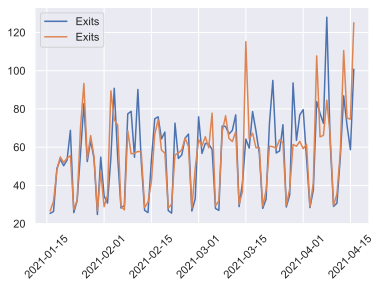

In [25]:
plt.plot(turnstiles_Date.index, turnstiles_Date['Entry_Count'],label = "Exits")
plt.plot(turnstiles_Date.index, turnstiles_Date['Exit_Count'],label = "Exits")
plt.xticks(rotation = 45);
plt.legend();

## Rider Traffic by days of the week

In [26]:
times = ['Morning', 'Afternoon', 'Evening', 'Night' ]

riders_TimeOfDay = turnstiles_df_cleaned_day.groupby(['timeOfDay']).mean()\
          .reset_index()

riders_TimeOfDay.head(10) 

,timeOfDay,Entry_Count,Exit_Count
0,Afternoon,82.993763,76.937237
1,Evening,88.280997,88.445544
2,Morning,41.704723,42.127466
3,Night,34.941346,41.929132


In [27]:
riders_TimeOfDay_1 = riders_TimeOfDay.reindex(times)

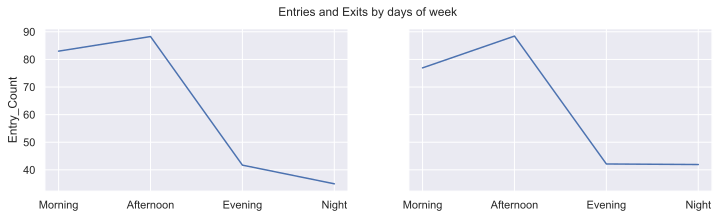

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
fig.suptitle('Entries and Exits by days of week')

sns.lineplot(ax = axes[0],x = riders_TimeOfDay_1.index ,y='Entry_Count',data=riders_TimeOfDay);
sns.lineplot(ax = axes[1],x = riders_TimeOfDay_1.index,y='Exit_Count',data=riders_TimeOfDay);




In [29]:
turnstiles_df_cleaned_day.head()

,Unique_Turnstile,STATION,Date_Time,Entry_Count,Exit_Count,Day_Week,timeOfDay
0,A002R05102-00-00,59 ST,2021-01-16 07:00:00,4.0,7.0,Saturday,Morning
1,A002R05102-00-00,59 ST,2021-01-16 11:00:00,21.0,33.0,Saturday,Morning
2,A002R05102-00-00,59 ST,2021-01-16 15:00:00,84.0,41.0,Saturday,Afternoon
3,A002R05102-00-00,59 ST,2021-01-16 19:00:00,136.0,17.0,Saturday,Evening
4,A002R05102-00-00,59 ST,2021-01-16 23:00:00,87.0,8.0,Saturday,Night


## Unsafe Subway Stations by Days of the Week

In [30]:
turnstiles_df_cleaned_day['Rider_Traffic'] = turnstiles_df_cleaned_day['Entry_Count'] + turnstiles_df_cleaned_day['Exit_Count']

In [31]:
turnstiles_df_cleaned_day = turnstiles_df_cleaned_day.drop(['Entry_Count','Exit_Count'], axis=1)

In [32]:
Station_day = turnstiles_df_cleaned_day.groupby([ 'STATION', 'Day_Week']).mean()\
             .sort_values('Rider_Traffic', ascending=True)\
              .reset_index()

In [33]:
Station_day.head(10)

,STATION,Day_Week,Rider_Traffic
0,TOMPKINSVILLE,Sunday,2.272894
1,BEACH 105 ST,Sunday,3.189744
2,ST. GEORGE,Sunday,3.630547
3,TOMPKINSVILLE,Saturday,4.043659
4,BROAD CHANNEL,Sunday,4.588745
5,AVENUE N,Sunday,4.758242
6,AVENUE N,Saturday,4.897436
7,BROAD CHANNEL,Saturday,4.958974
8,BEACH 105 ST,Saturday,5.024242
9,BEACH 105 ST,Monday,5.205195


In [34]:
Station_Sunday = Station_day.loc[(Station_day.Day_Week == "Sunday")]

In [35]:
Station_Sunday.describe() # Lets consider less that 25% i.e less than 35 riders on Sunday is unsafe

,Rider_Traffic
count,378.000000
mean,74.855617
std,99.119930
min,2.272894
25%,34.563151
50%,57.082138
75%,88.771227
max,1507.843750


In [36]:
Station_Sunday = Station_day.loc[(Station_day.Day_Week == "Sunday") & (Station_day.Rider_Traffic < 35)]

In [37]:
Station_Sunday.head()

,STATION,Day_Week,Rider_Traffic
0,TOMPKINSVILLE,Sunday,2.272894
1,BEACH 105 ST,Sunday,3.189744
2,ST. GEORGE,Sunday,3.630547
4,BROAD CHANNEL,Sunday,4.588745
5,AVENUE N,Sunday,4.758242


In [38]:
Station_Saturday = Station_day.loc[(Station_day.Day_Week == "Saturday")]

In [39]:
Station_Saturday.describe() # Less than 38 riders is considered unsafe

,Rider_Traffic
count,378.000000
mean,60.779127
std,29.655386
min,4.043659
25%,38.988241
50%,59.887304
75%,80.744359
max,156.089820


In [40]:
Station_Saturday = Station_day.loc[(Station_day.Day_Week == "Saturday") & (Station_day.Rider_Traffic < 38)]

In [41]:
Station_Monday = Station_day.loc[(Station_day.Day_Week == "Monday")]

In [42]:
Station_Monday.describe() # Less than 67 riders is unsafe

,Rider_Traffic
count,378.000000
mean,129.555725
std,144.899969
min,5.205195
25%,67.553228
50%,101.328879
75%,147.752444
max,1725.541700


In [43]:
Station_Monday = Station_day.loc[(Station_day.Day_Week == "Monday") & (Station_day.Rider_Traffic < 67)]

In [44]:
Station_Tuesday = Station_day.loc[(Station_day.Day_Week == "Tuesday")]

In [45]:
Station_Tuesday.describe() # Less than 73 riders is unsafe

,Rider_Traffic
count,378.000000
mean,139.429830
std,121.852865
min,6.306667
25%,73.921581
50%,110.742922
75%,167.956918
max,1276.043257


In [46]:
Station_Tuesday = Station_day.loc[(Station_day.Day_Week == "Tuesday") & (Station_day.Rider_Traffic < 73)]

In [47]:
Station_Wednesday = Station_day.loc[(Station_day.Day_Week == "Wednesday")]

In [48]:
Station_Wednesday.describe() # Less than 75 riders unsafe

,Rider_Traffic
count,378.000000
mean,133.893645
std,97.174299
min,6.114667
25%,75.560877
50%,115.086383
75%,166.781369
max,864.698667


In [49]:
Station_Wednesday = Station_day.loc[(Station_day.Day_Week == "Wednesday") & (Station_day.Rider_Traffic < 75)]

In [50]:
Station_Thursday = Station_day.loc[(Station_day.Day_Week == "Thursday")]

In [51]:
Station_Thursday.describe() # Less than 75 riders is unsafe

,Rider_Traffic
count,378.000000
mean,137.053325
std,102.398218
min,5.866667
25%,75.750127
50%,115.783566
75%,171.598493
max,846.652542


In [52]:
Station_Thursday = Station_day.loc[(Station_day.Day_Week == "Thursday") & (Station_day.Rider_Traffic < 75)]

In [53]:
Station_Friday = Station_day.loc[(Station_day.Day_Week == "Friday")]

In [54]:
Station_Friday.describe() # Less than 74 riders is unsafe 

,Rider_Traffic
count,378.000000
mean,145.463697
std,234.352202
min,5.680519
25%,74.506604
50%,115.037434
75%,167.017582
max,4147.497537


In [55]:
Station_Friday = Station_day.loc[(Station_day.Day_Week == "Friday") & (Station_day.Rider_Traffic < 75)]

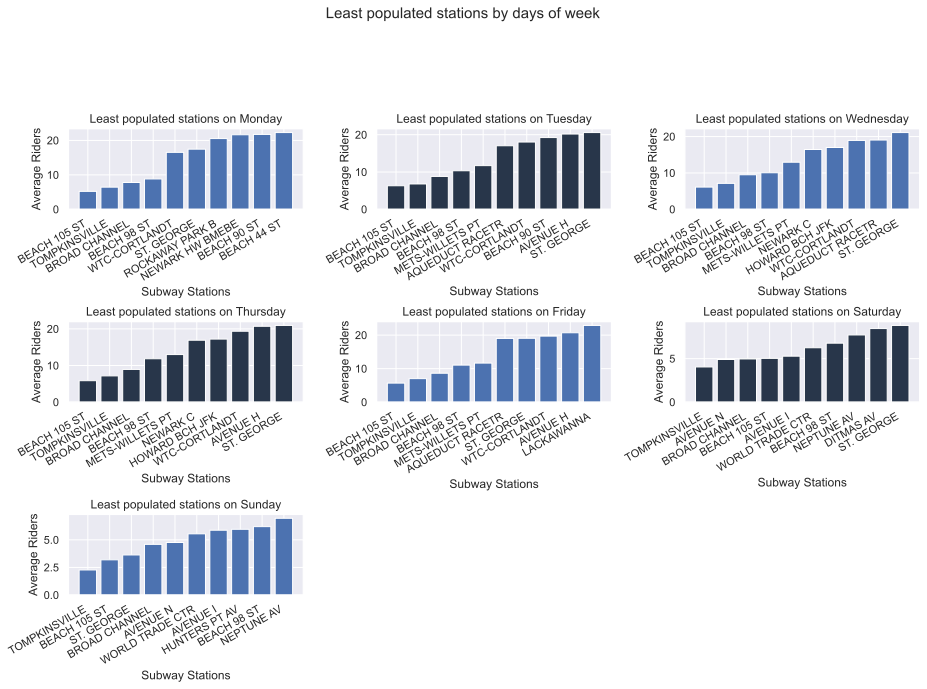

In [56]:
plt.figure(figsize=[13,10])

plt.suptitle('Least populated stations by days of week',fontsize = 15, y=1.10)



plt.subplot(4,3,1 ) # (number of rows, number of columns, number of plot)
plt.bar(Station_Monday['STATION'][:10],Station_Monday['Rider_Traffic'][:10])
plt.title('Least populated stations on Monday')
plt.xticks(rotation=30, ha='right');
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(4,3,2)
plt.bar(Station_Tuesday['STATION'][:10],Station_Tuesday['Rider_Traffic'][:10],color ='#28364A')
plt.title('Least populated stations on Tuesday')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(4,3,3)
plt.bar(Station_Wednesday['STATION'][:10],Station_Wednesday['Rider_Traffic'][:10])
plt.title('Least populated stations on Wednesday')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(4,3,4)
plt.bar(Station_Thursday['STATION'][:10],Station_Thursday['Rider_Traffic'][:10], color ='#28364A')
plt.title('Least populated stations on Thursday')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(4,3,5)
plt.bar(Station_Friday['STATION'][:10],Station_Friday['Rider_Traffic'][:10])
plt.title('Least populated stations on Friday')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(4,3,6)
plt.bar(Station_Saturday['STATION'][:10],Station_Saturday['Rider_Traffic'][:10],color ='#28364A')
plt.title('Least populated stations on Saturday')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(4,3,7)
plt.bar(Station_Sunday['STATION'][:10],Station_Sunday['Rider_Traffic'][:10])
plt.title('Least populated stations on Sunday')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')
plt.tight_layout();

## Unsafe Stations by Times of a Day

In [57]:
turnstiles_df_cleaned_day.head()

,Unique_Turnstile,STATION,Date_Time,Day_Week,timeOfDay,Rider_Traffic
0,A002R05102-00-00,59 ST,2021-01-16 07:00:00,Saturday,Morning,11.0
1,A002R05102-00-00,59 ST,2021-01-16 11:00:00,Saturday,Morning,54.0
2,A002R05102-00-00,59 ST,2021-01-16 15:00:00,Saturday,Afternoon,125.0
3,A002R05102-00-00,59 ST,2021-01-16 19:00:00,Saturday,Evening,153.0
4,A002R05102-00-00,59 ST,2021-01-16 23:00:00,Saturday,Night,95.0


In [58]:
Station_timeOfDay = turnstiles_df_cleaned_day.groupby([ 'STATION', 'timeOfDay']).mean()\
             .sort_values('Rider_Traffic', ascending=True)\
              .reset_index()

In [59]:
Station_timeOfDay.head()

,STATION,timeOfDay,Rider_Traffic
0,33 ST,Night,2.164474
1,TOMPKINSVILLE,Morning,3.722581
2,137 ST CITY COL,Night,4.333333
3,BEACH 105 ST,Morning,4.339923
4,BEACH 105 ST,Afternoon,5.465686


In [60]:
Station_timeOfDay_Morning = Station_timeOfDay.loc[(Station_timeOfDay.timeOfDay == "Morning")]

In [61]:
Station_timeOfDay_Morning.head()

,STATION,timeOfDay,Rider_Traffic
1,TOMPKINSVILLE,Morning,3.722581
3,BEACH 105 ST,Morning,4.339923
8,METS-WILLETS PT,Morning,6.723061
9,BEACH 98 ST,Morning,6.957790
11,BROAD CHANNEL,Morning,7.858201


In [62]:
Station_timeOfDay_Morning.describe(percentiles = [.15]) # Considering less than 15% 38 riders as unsafe

,Rider_Traffic
count,378.000000
mean,88.054306
std,71.052232
min,3.722581
15%,38.937361
50%,72.991586
max,653.849782


In [63]:
Station_timeOfDay_Morning = Station_timeOfDay.loc[(Station_timeOfDay.timeOfDay == "Morning")& (Station_timeOfDay.Rider_Traffic < 38)]

In [64]:
Station_timeOfDay_Afternoon = Station_timeOfDay.loc[(Station_timeOfDay.timeOfDay == "Afternoon")]

In [65]:
Station_timeOfDay_Afternoon.describe(percentiles = [.15]) # Less than 67 riders is unsafe

,Rider_Traffic
count,378.000000
mean,165.725217
std,128.147246
min,5.465686
15%,67.281388
50%,138.777484
max,1048.862241


In [66]:
Station_timeOfDay_Afternoon = Station_timeOfDay.loc[(Station_timeOfDay.timeOfDay == "Afternoon")& (Station_timeOfDay.Rider_Traffic < 67)]

In [67]:
Station_timeOfDay_Evening = Station_timeOfDay.loc[(Station_timeOfDay.timeOfDay == "Evening")]
Station_timeOfDay_Evening.describe(percentiles = [.15])

,Rider_Traffic
count,378.000000
mean,186.236719
std,191.900539
min,6.619048
15%,77.012073
50%,154.611763
max,3163.147193


In [68]:
Station_timeOfDay_Evening = Station_timeOfDay.loc[(Station_timeOfDay.timeOfDay == "Evening")& (Station_timeOfDay.Rider_Traffic < 77)]

In [69]:
Station_timeOfDay_Night = Station_timeOfDay.loc[(Station_timeOfDay.timeOfDay == "Night")]
Station_timeOfDay_Night.describe(percentiles = [.15])

,Rider_Traffic
count,239.000000
mean,80.629318
std,53.361758
min,2.164474
15%,32.330759
50%,70.318134
max,456.189331


In [70]:
Station_timeOfDay_Night = Station_timeOfDay.loc[(Station_timeOfDay.timeOfDay == "Night")& (Station_timeOfDay.Rider_Traffic < 32)]

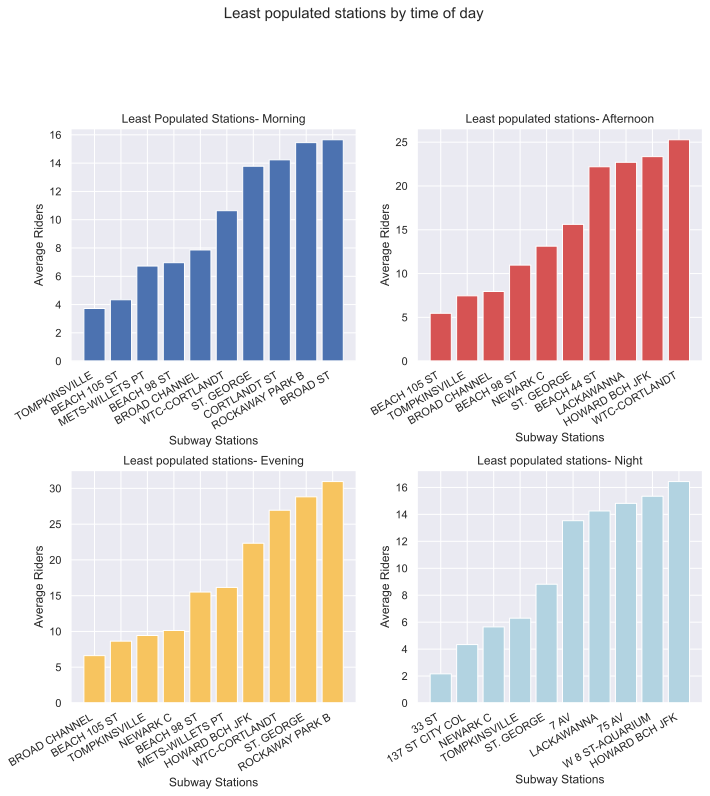

In [71]:
plt.figure(figsize=[10,10])

plt.suptitle('Least populated stations by time of day',fontsize = 15, y=1.10)



plt.subplot(2,2,1 ) # (number of rows, number of columns, number of plot)
plt.bar(Station_timeOfDay_Morning['STATION'][:10],Station_timeOfDay_Morning['Rider_Traffic'][:10])
plt.title('Least Populated Stations- Morning')
plt.xticks(rotation=30, ha='right');
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(2,2,2)
plt.bar(Station_timeOfDay_Afternoon['STATION'][:10],Station_timeOfDay_Afternoon['Rider_Traffic'][:10],color = '#D65353')
plt.title('Least populated stations- Afternoon')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(2,2,3)
plt.bar(Station_timeOfDay_Evening['STATION'][:10],Station_timeOfDay_Evening['Rider_Traffic'][:10],color ='#F7C45F')
plt.title('Least populated stations- Evening')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')

plt.subplot(2,2,4)
plt.bar(Station_timeOfDay_Night['STATION'][:10],Station_timeOfDay_Night['Rider_Traffic'][:10], color ='#B2D3E1')
plt.title('Least populated stations- Night')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Subway Stations')
plt.ylabel('Average Riders')


plt.tight_layout();